# Midterm 2
## Jay Steinberg

All my work and code are my own and not shared with anyone.

## Q1. 

A) Find characteristic equation of matrix A

> This was done by hand on paper, using $ det(A-\lambda I) = 0$
>
> Characteristic equation: $-\lambda^3 + 2\lambda^2 +64\lambda + 142 = 0$

In [3]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from numpy import linalg as la
from scipy.optimize import fsolve
import scipy.optimize as op
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

B) solve the characteristic equation and find ALL eigenvalues

In [4]:
a = np.array([[-2,1,3],[1,-3,5],[3,5,7]])

def a_characteristic(x):
  return -x**3 + 2*x**2 + 64*x + 142

roots = fsolve(a_characteristic, [-500, 0, 500])

print('Matrix a = ') # see the matrix
print(a, '\n')

print('The solutions of the characteristic equation are (in no particular order): ')
print(roots, '\n') 

Matrix a = 
[[-2  1  3]
 [ 1 -3  5]
 [ 3  5  7]] 

The solutions of the characteristic equation are (in no particular order): 
[-5.09209759 -2.81483235  9.90692994] 



## Q2.

Consider stress matrix at a point.

A) Find the principal stresses at this point.

In [15]:
stress = np.array([[1, 5, -1],
                   [5, -3, 8],
                   [3, 5, 7]])

# print(stress)

pr_stress, pr_planes = la.eig(stress)

p1 = pr_planes[:,0]
p2 = pr_planes[:,1]
p3 = pr_planes[:,2]

print('The principal stresses are: ')
print(pr_stress, '\n')

print('Max principal stress is: ', pr_stress[0], 'MPa\n')

print('The corresponding principal plane normal vector is given by')
print(p1, '\n')

p1_x = np.dot(p1,[1,0,0])

x_angle_rads=np.arccos(p1_x/(la.norm(p1)))
x_angle_degs = x_angle_rads * 180 / np.pi

print('Its angle with the x axis is ', x_angle_degs, "degrees.")


The principal stresses are: 
[10.95950663  1.77058113 -7.73008776] 

Max principal stress is:  10.959506634734646 MPa

The corresponding principal plane normal vector is given by
[-0.18765071 -0.538124   -0.82171149] 

Its angle with the x axis is  100.81571392679858 degrees.


## Q3. 

The equations of motion for a double spring mass system in series are as shown. 

Rearrange and show that the above equation can be written in the classical eigenvalue equation form $Ax = \lambda x$. 

Identify the components of the square matrix $A$ in terms of $m,k$ and show that the eigenvalue $\lambda = -\omega^2$.

> Equations can be rewritten in matrix form as:
>
> $\left[
\begin{array}{cc}
-2k/m+\omega^2 & k/m\\
k/m & -2k/m+\omega^2
\end{array}
\right] 
\left[
\begin{array}{c}
x_1 \\
x_2
\end{array}
\right] 
=
\left[
\begin{array}{c}
0 \\
0
\end{array}
\right] $ 
> 
> which shows $-\omega^2$ as an eigenvalue by the definition $[A-\lambda I]X = 0$

## Q4.

Consider the following data

a) Plot $x vs. y$ in a scatter plot. 

> Scatter plot is also repeated below with curve fit.

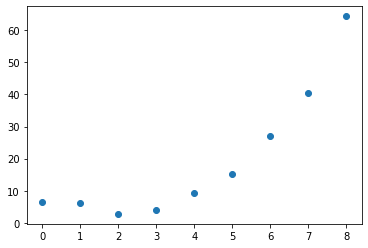

In [19]:
x_data = np.linspace(0,8,9)
# print(x_data)
y_data = np.array([6.6, 6.15, 2.8, 4.03, 9.2, 15.11, 27.09, 40.45, 64.32])
# print(y_data)

plt.figure()
plt.scatter(x_data,y_data)

B) Find a smallest degree polynomial which best fits the data; not such a high degree that it goes through every point. User judgement.

>The scatter plot looks like it could be well fit with a cubic or even a quadratic function. I will try a cubic.

C) Plot the polynomical found in (b) on the same plot as (a); it must show that the polynomial is a good fit to the data.

Regression a_0 is:  6.9345454545454235
Regression a_1 is:  -2.3325360750360833
Regression a_2 is:  0.15175324675324886
Regression a_3 is:  0.12835858585858598


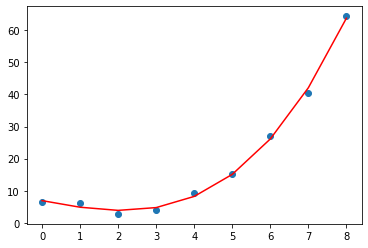

In [27]:
# convert to necessary shape
y_vec = y_data.T
x_vec = x_data.T

X=np.empty((9,3))
X[:,0] = x_data
X[:,1] = x_data**2
X[:,2] = x_data**3

# linear regression
curve = LinearRegression().fit(X, y_data)
icept = curve.intercept_
coeff = curve.coef_

# print(coeff, icept)
print('Regression a_0 is: ', icept)
print('Regression a_1 is: ', coeff[0])
print('Regression a_2 is: ', coeff[1])
print('Regression a_3 is: ', coeff[2])

# plot curve
y_curve = icept + coeff[0]*x_vec + coeff[1]*x_vec**2 + coeff[2]*x_vec**3
plt.scatter(x_vec, y_vec)
plt.plot(x_vec, y_curve, color='Red')